<a href="https://colab.research.google.com/github/lakshminandu46/OIBSIP/blob/main/Email_spam_detection_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


DATA COLLECTION


In [ ]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [ ]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data= df.where((pd.notnull(df)),'')  # replacing the null value with blank space
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [ ]:
data.isnull().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [ ]:
#check the percentage of null value
df.isnull().mean()*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

As we can see there are huge number of missing data in Unnamed:2,Unnamed:3,Unnamed:4 col i.e more than 99%.So we can remove these columns.

In [ ]:
data.shape

(5572, 5)

In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#check descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#check the number of rows and columns present in df
print('rows---->',df.shape[0])
print('columns---->',df.shape[1])

rows----> 5572
columns----> 5


In [ ]:
# removing unwanted columns
df.drop(columns=df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)


In [ ]:
# renaming columns
data.rename(columns={'v1': 'Category', 'v2' :'Message '}, inplace=True)
df



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
#Rename columns names for easy to understand, we can also use df.rename
df.columns=['spam/ham','sms']

In [ ]:
#label encoding
df.loc[df['spam/ham'] == 'spam', 'spam/ham',] = 0
df.loc[df['spam/ham'] == 'ham', 'spam/ham',] = 1
df

,spam/ham,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
#Devide x and y parameters to train model
x=df.sms
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [ ]:
y =df['spam/ham']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5572, dtype: object

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
 #shapes of X_train,X_test,Y_train,Y_test
print(x.shape)
print(y.shape)


(5572,)
(5572,)


In [ ]:
print(X_train.shape)
print(X_test.shape)


(4457,)
(1115,)


FEATURE EXTRACTION

In [ ]:
X_train,X_test

(3705    Reading gud habit.. Nan bari hudgi yorge patai...
 1649                       ITS A LAPTOP TAKE IT WITH YOU.
 4833                        I hope your pee burns tonite.
 919                 Dont talk to him ever ok its my word.
 3856    No! But we found a diff farm shop to buy some ...
                               ...                        
 1607    Jus telling u dat i'll b leaving 4 shanghai on...
 3915                                        Ok. C u then.
 1428    Tell you what, if you make a little spreadshee...
 4367    1 I don't have her number and 2 its gonna be a...
 2522    Dunno lei... I might b eatin wif my frens... I...
 Name: sms, Length: 4457, dtype: object,
 4732    Good Morning my Dear Shijutta........... Have ...
 4952    I lost 4 pounds since my doc visit last week w...
 3724                   Nothing spl..wat abt u and whr ru?
 5261    I absolutely LOVE South Park! I only recently ...
 1274    Let me know how to contact you. I've you settl...
               

In [ ]:
Y_train,Y_test

(3705    1
 1649    1
 4833    1
 919     1
 3856    1
        ..
 1607    1
 3915    1
 1428    1
 4367    1
 2522    1
 Name: spam/ham, Length: 4457, dtype: object,
 4732    1
 4952    1
 3724    1
 5261    1
 1274    1
        ..
 1388    1
 4742    1
 5551    1
 3452    1
 226     0
 Name: spam/ham, Length: 1115, dtype: object)

 Machine learning algorithms performs well with respect to numbers,so we need to convert the text data into numbers.For that I will use TfidfVectorizer techinque from feature_extraction of sklearn.

In [ ]:
#tranform the test data into feature vectors that can be used as input to the Logistic regression

feature_extraction=TfidfVectorizer(min_df=1,stop_words='english', lowercase=True)
feature_extraction

TfidfVectorizer(stop_words='english')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
#model fiting
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

In [ ]:
#changing values of test data from object to integer
Y_test=Y_test.astype('int')
Y_train=Y_train.astype('int')

**TRAIN THE MODEL**

In [ ]:
model=LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluation of model


In [ ]:
Model_predict= model.predict(X_train_features)
accuracy=accuracy_score(Y_train, Model_predict)


In [ ]:
# accuracy on train data
print('Accuracy on training data: ', accuracy*100)

Accuracy on training data:  96.7915638321741


In [ ]:
Model_predict_test= model.predict(X_test_features)
accuracy2=accuracy_score(Y_test, Model_predict_test)

In [ ]:
# accuracy on test data
print('Accuracy on training data: ', accuracy2*100)

Accuracy on training data:  96.05381165919282


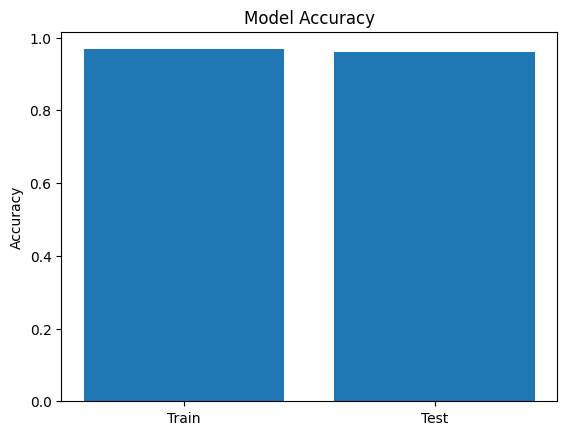

In [ ]:
plt.bar(["Train", "Test"], [accuracy, accuracy2])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

Predictive System

In [ ]:
input_mail=["Hello! welcome to oasisInfobyte"]
feature_ext=feature_extraction.transform(input_mail)
predict_mail= model.predict(feature_ext)
print(predict_mail)

if predict_mail[0]==1:
  print ('ham')
if predict_mail[0]==0:
  print ('spam')

[1]
ham
